In [ ]:
#Código do link: Bing Vídeos
#https://www.bing.com/videos/riverview/relatedvideo?q=aprenda+deep+learning+predi%c3%a7%c3%a3o+de+a%c3%a7%c3%b5es&mid=E0528AFB50F60C855987E0528AFB50F60C855987&FORM=VIRE


In [1]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import yfinance
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

#import xlrd
pd.options.mode.chained_assignment = None
#file = '/Users/User/Documents/Marcos/DSA/TCC/Analise e Predição de Produção Agricola/PredAgric/CanaSerieHistZ.xls'
file = '/Users/User/Documents/Marcos/CanaSerieHistZ.xls'
prodcana = pd.read_excel(file, sheet_name = 2)
prodcana.head()
#pip install tensorflow

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,CANA-DE-AÇÚCAR - BRASIL -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Série Histórica de Produtividade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Safras 2005/06 a 2023/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Em kg/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,REGIÃO/UF,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24 (¹)


In [2]:
# criando dataframe...
# na planilha tem 3 pastas: Área, Produtividade e Produção
# Na linha 6 tem a safra, na coluna A a localização, em estado sumarizando por região e total
# Vamos trabalhar com Produtividade que é o resultado da Produção dividido por Área

df = pd.DataFrame(prodcana)
df.drop([0,1,2,3,40,41,42], inplace = True)
#df.index = df['CANA-DE-AÇÚCAR - BRASIL']
df.columns = df.iloc[0]
df.index = df['REGIÃO/UF']
df.drop(['REGIÃO/UF'], axis = 1, inplace = True)

#df.drop(['CANA-DE-AÇÚCAR - BRASIL'], axis = 1, inplace = True)

df.drop(['REGIÃO/UF'], inplace = True)
df


4,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24 (¹)
REGIÃO/UF,,,,,,,,,,,,,,,,,,,
NORTE,57633,63732,65464,68252,57670,65124,73522,70432,79736,78117,69438,62465,69946,66932,81726,76392,85659,80862.134608,83809.013539
RR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RO,0,0,0,63000,63000,52380,56712,48870,63391,84850,44010,39942,42857,45669,0,0,0,0,0
AC,0,0,0,0,0,80400,92352,95000,75350,0,54219,29676,0,0,0,0,0,0,0
AM,50750,56900,80500,80500,55090,91320,75918,72411,72530,56200,63074,72758,62213,67294,86695,76289,83011,56652.806653,71484.071484
AP,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0
PA,58300,70160,68146,66146,57193,52290,53012,60780,68787,67431,59743,64492,72188,69329,82410,75208,88053,79130.6591,79948.774241
TO,62043,56030,50000,52000,66000,84750,92872,76378,87647,84293,78274,65227,71467,66642,80766,76985,84781,85159.719238,87731.710768
NORDESTE,52534,55954,65429,61197,56049,55764,56964,48903,51460,56857,49376,47822,48849,53254,58176,57017,60260,64313.428101,62342.104806


In [3]:
# Aqui preciso criar um array, invertendo a matriz, deixando apenas a linha  Brasil, como coluna
# e as safgras serão as linhas
df
linha_array = df.loc['BRASIL'].to_numpy().reshape(-1, 1)
linha_array


array([[74318],
       [77038],
       [81506],
       [80965],
       [81585],
       [77446],
       [67081],
       [69407],
       [74769],
       [70495],
       [76903],
       [72623],
       [72543],
       [72234],
       [76133],
       [75965],
       [70357],
       [73608.53695428856],
       [75751.12099374075]], dtype=object)

In [4]:
tamanho_dados_treinamento = int(len(linha_array) * 0.8)

tamanho_dados_treinamento

15

In [5]:
df.loc['BRASIL']

4
2005/06               74318
2006/07               77038
2007/08               81506
2008/09               80965
2009/10               81585
2010/11               77446
2011/12               67081
2012/13               69407
2013/14               74769
2014/15               70495
2015/16               76903
2016/17               72623
2017/18               72543
2018/19               72234
2019/20               76133
2020/21               75965
2021/22               70357
2022/23        73608.536954
2023/24 (¹)    75751.120994
Name: BRASIL, dtype: object

In [6]:
#escalar os dados entre 0 e 1, para deixar mais fácil o processamento
#dados em escala pré definidas são mais fáceis de lidar. 

#Outra definição e a Normalização, que  é uma técnica que visa colocar os dados
#em uma escala comum, sem distorcer as diferenças nos intervalos de valores.

escalador = MinMaxScaler(feature_range=(0, 1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(linha_array[0: tamanho_dados_treinamento, :])

dados_entre_0_e_1_teste = escalador.transform(linha_array[tamanho_dados_treinamento: , :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))
                                                

dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)

In [7]:
dados_para_treinamento = dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

#dados que serão usados para gerar o resultado
treinamento_x = []
#cotação que aconteceu de fato
treinamento_y = []


for i in range(5, len(dados_para_treinamento)):

    #O modelo usa as 5 ultimas safras para previsão
    treinamento_x.append(dados_para_treinamento[i - 5: i, 0])
    #cotacao
    treinamento_y.append(dados_para_treinamento[i, 0])

    if i <= 6:

        print(treinamento_x)
        print(treinamento_y)



[array([0.4989658 , 0.68650028, 0.99455323, 0.95725317, 1.        ])]
[0.7146304467733042]
[array([0.4989658 , 0.68650028, 0.99455323, 0.95725317, 1.        ]), array([0.68650028, 0.99455323, 0.95725317, 1.        , 0.71463045])]
[0.7146304467733042, 0.0]


In [8]:
#transformando as listas em arrays e dando reshape 3d 

treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)

treinamento_x

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

treinamento_x

array([[[0.4989658 ],
        [0.68650028],
        [0.99455323],
        [0.95725317],
        [1.        ]],

       [[0.68650028],
        [0.99455323],
        [0.95725317],
        [1.        ],
        [0.71463045]],

       [[0.99455323],
        [0.95725317],
        [1.        ],
        [0.71463045],
        [0.        ]],

       [[0.95725317],
        [1.        ],
        [0.71463045],
        [0.        ],
        [0.16036955]],

       [[1.        ],
        [0.71463045],
        [0.        ],
        [0.16036955],
        [0.53006067]],

       [[0.71463045],
        [0.        ],
        [0.16036955],
        [0.53006067],
        [0.23538334]],

       [[0.        ],
        [0.16036955],
        [0.53006067],
        [0.23538334],
        [0.6771925 ]],

       [[0.16036955],
        [0.53006067],
        [0.23538334],
        [0.6771925 ],
        [0.38210149]],

       [[0.53006067],
        [0.23538334],
        [0.6771925 ],
        [0.38210149],
        [0.37658

In [9]:
#construindo o modelo

modelo = Sequential()

#vamos criar um modelo com 50 neurônios
#return sequences = True pois vamos usar outro LSTM depois.
#definir o shape, que no caso são 60 informações para gerar uma.
#Adicionar mais neurônios com o dense, 25 e 1
#Não se apegue a isso agora, é apenas um arquitetura de deep learning.

# modelo.add(Dense(units=64, activation='relu', input_dim=100))     <-aqui foi uma tentativa de sair do lstm
modelo.add(LSTM(50, return_sequences=True, input_shape = (treinamento_x.shape[1], 1)))
modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))


In [10]:
#copilando o modelo

# a função de loss é a forma de medir o erro do modelo, que nesse caso
#é o classico erro médio quadrático da que é usado em regressão linear
#otimizador e medida de erro

#ETA é a abreviação de “Estimated Time of Arrival”. 
#No treinamento LSTM, o ETA é uma estimativa do tempo restante para o término do treinamento

modelo.compile(optimizer="adam", loss="mean_squared_error") 

In [11]:
#Modelo compuilado e dados preparados, vamos treinar o modelo...


In [12]:
#agora com o modelo copilado e os dados, podemos treinar o modelo

modelo.fit(treinamento_x, treinamento_y, batch_size=1, epochs=1)


10/10 [==============================] - 3s 7ms/step - loss: 0.1250


In [13]:
#criar dados de teste

dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 5:, :]

teste_x = []
teste_y = linha_array[tamanho_dados_treinamento: , :] 

for i in range(5, len(dados_teste)):
    teste_x.append(dados_teste[i - 5: i, 0])
    

In [14]:
#reshape
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [15]:
#pegando predições do modelo

predicoes = modelo.predict(teste_x)

#tirando a escala dos dados

predicoes = escalador.inverse_transform(predicoes)

predicoes

1/1 [==============================] - 1s 712ms/step


array([[71288.734],
       [71136.07 ],
       [71186.03 ],
       [71244.4  ]], dtype=float32)

In [16]:
#pegando o erro médio quadrático (RMSE)

rmse = np.sqrt(np.mean(predicoes - teste_y) ** 2)
rmse

2706.6058932573287

In [17]:
 df.loc['BRASIL'][:tamanho_dados_treinamento]

4
2005/06        74318
2006/07        77038
2007/08        81506
2008/09        80965
2009/10        81585
2010/11        77446
2011/12        67081
2012/13        69407
2013/14        74769
2014/15        70495
2015/16        76903
2016/17        72623
2017/18        72543
2018/19        72234
2019/20        76133
Name: BRASIL, dtype: object

In [18]:
#criando o grafico do modelo

import pandas as pandas

treinamento = df.loc['BRASIL'][:tamanho_dados_treinamento]
df_teste = pd.DataFrame({"Produtividade": df.loc['BRASIL'][tamanho_dados_treinamento:],
                        "Predicoes": predicoes.reshape(len(predicoes))})


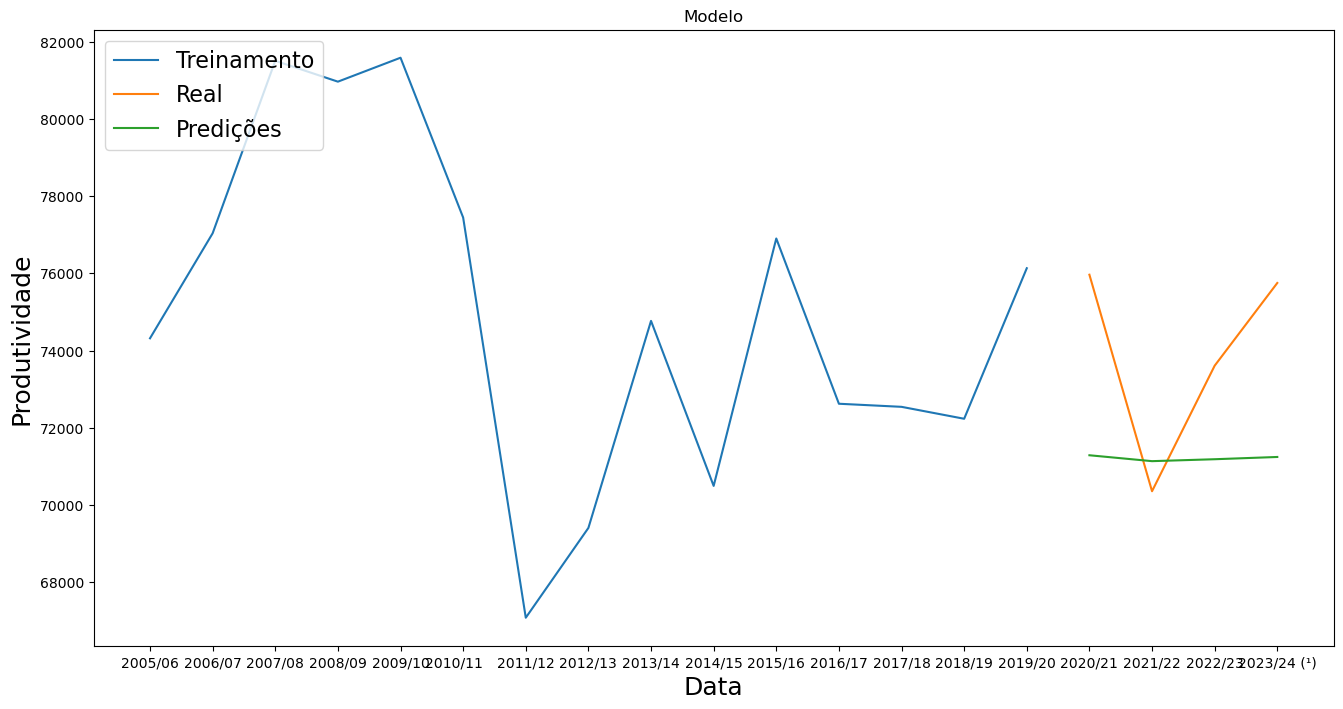

In [19]:
plt.figure(figsize =(16, 8))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel("Produtividade", fontsize = 18)
plt.plot(treinamento)
plt.plot(df_teste[['Produtividade', 'Predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})
plt.show()

In [ ]:
df_teste.sort_index()

df_teste

In [ ]:
#o preço é legal, mas o importante é acertar pra qual mercado o lado vai. Sera q isso foi feito?

#calcular media de acertos e expectativa de lucro

df_teste['variacao_percentual_acao'] = df_teste['Produtividade'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['Predicoes'].pct_change()

df_teste = df_teste.dropna()

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0, 
                                                      True, False)
df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0, 
                                                      True, False)

df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero'] == df_teste['var_modelo_maior_menor_que_zero']
                                      , True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste


In [ ]:
print(media_lucro)

In [ ]:
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])
acertou_lado

In [ ]:
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])
errou_lado = 1 - acertou_lado

media_lucro = df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()

exp_mat_lucro = acertou_lado * media_lucro[1] - media_lucro[0] * errou_lado

ganho_sobre_perda = media_lucro[1]/media_lucro[0]

print(media_lucro)
print(ganho_sobre_perda)
print(acertou_lado)
print(exp_mat_lucro * 100)

In [ ]:
#criando um código que você passa 5 safras e ele devolve a previsão
#resumindo: vamos descobrir a safra futura com esse modelo

data_hoje = datetime.now()

#se quiser escolher um dia, basta fazer assim

data_hoje = datetime.now() - timedelta(days = 1)

if data_hoje.hour > 18:
    
    final = data_hoje
    inicial = datetime.now() - timedelta(days = 252)
    
else:
    final = data_hoje - timedelta(days = 1)
    inicial = datetime.now() - timedelta(days = 252)
    
#nao vai botar outra ação aqui hein kkkkkkkk
cotacoes = pdr.get_data_yahoo(acao, inicial, final) 
ultimos_60_dias = cotacoes['Close'].iloc[-60:].values.reshape(-1, 1)

ultimos_60_dias_escalado = escalador.transform(ultimos_60_dias)

teste_x = []
teste_x.append(ultimos_60_dias_escalado)
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

previsao_de_preco = modelo.predict(teste_x)
previsao_de_preco = escalador.inverse_transform(previsao_de_preco)

print(previsao_de_preco)